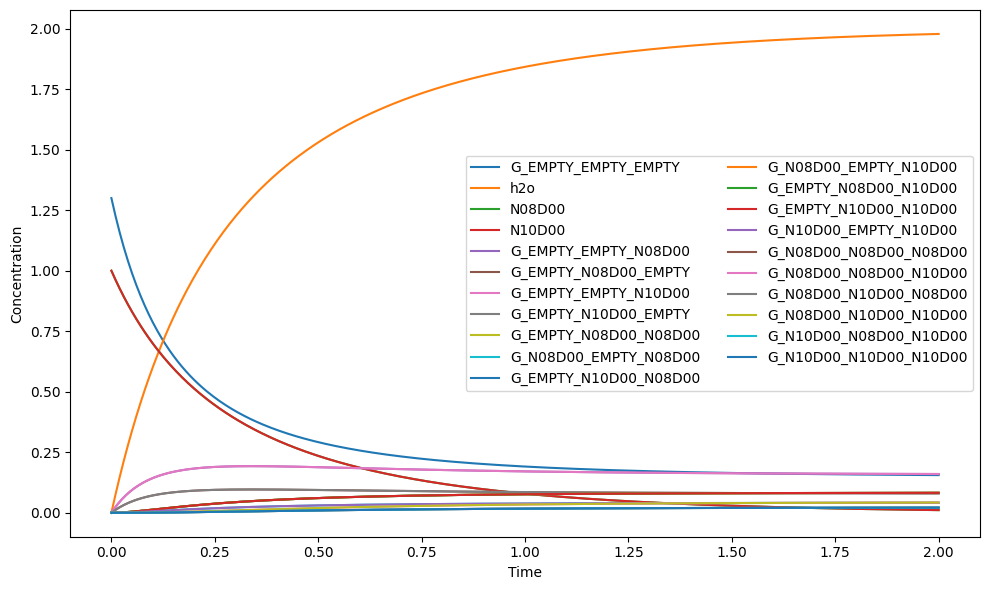

TypeError: 'list' object is not callable

In [3]:
from glyze import FattyAcid, Glyceride, ChemReactSim
from rdkit import Chem
from rdkit.Chem import AllChem
from tabulate import tabulate
import pandas as pd

# data set
fa2 = FattyAcid(length=2)
fa3 = FattyAcid(length=3)
fa4 = FattyAcid(length=4)
fa5 = FattyAcid(length=5)
fa6 = FattyAcid(length=6)
fa7 = FattyAcid(length=7)
fa8 = FattyAcid(length=8)
fa9 = FattyAcid(length=9)
fa10 = FattyAcid(length=10)
fa11 = FattyAcid(length=11)
fa12 = FattyAcid(length=12)
fa13 = FattyAcid(length=13)
fa14 = FattyAcid(length=14)
fa15 = FattyAcid(length=15)
fa16 = FattyAcid(length=16)
fa17 = FattyAcid(length=17)
fa18 = FattyAcid(length=18)
fa19 = FattyAcid(length=19)
fa20 = FattyAcid(length=20)
fa21 = FattyAcid(length=21)
fa22 = FattyAcid(length=22)

# glycerol
Gly = Glyceride(sn=(None, None, None))
# print(Gly.name)
glym = Gly.molar_mass

# sanity check:
mct = Glyceride(sn=(fa8, fa8, fa10))
mctm = mct.molar_mass

# water
"""Calculate the molar mass of the water in g/mol"""
# Build RDkit molecule and sum atomic masses
# Initialize empty RWMol
rw = Chem.RWMol()
# oxygen
o = rw.AddAtom(Chem.Atom(8)) 

# Connect to water
mol = rw.GetMol()
Chem.SanitizeMol(mol)
mol = Chem.AddHs(mol)

h2omass = 0
for atom in mol.GetAtoms():
    h2omass += atom.GetMass()

# testing for esterification
list_of_fa=[fa8, fa10]
sim = ChemReactSim.p_kinetic_esterification(list_of_fa, initial_conc = [1.3, 1, 1], chem_flag=True)
sim.overall_order = 2
sol1 = sim.solve(t_span=(0.0, 2))
sim.plot(sol=sol1)

# tabulated form
inital_conc = sol1.y[:, 0]
final_conc = sol1.y[:, -1]
sp_mass = sim.masses
inital_mass = inital_conc*sp_mass
final_mass = final_conc*sp_mass
total_initial_mass = sum(inital_mass)
total_final_mass = sum(final_mass)
table = list(zip(sim.species_names, inital_conc, final_conc, inital_mass, final_mass))
print(tabulate(table, headers=["Species","Inital Concentration", "Final Concentration", "Inital Mass", "Final Mass"], floatfmt=".6g"))
summary_table = [
    ["Total Initial Mass", total_initial_mass],
    ["Total Final Mass", total_final_mass]
]
print(tabulate(summary_table, headers=["", "Mass"], floatfmt=".6g"))

test = sim.species_names
list_of_mixture = [Glyceride.from_name(test[0])]
list = [FattyAcid.from_name(name) for name in test[2:len(list_of_fa)]]
lists = [Glyceride.from_name(name) for name in test[2+len(list_of_fa):]]
list_of_mixture.extend(lists)
print(fa8)
print(len(list_of_mixture))
print(list_of_mixture)

In [ ]:
mct1 = Glyceride(sn=(fa8, fa8, fa10))
mct2 = Glyceride(sn=(fa10, fa10, fa11))

simu = ChemReactSim.p_kinetic_interesterification(list_of_stuff=[mct1, mct2], initial_conc = [2,4], plucked = ["end", "mid"], arranged = ["mid", "end"], chem_flag=True)
simu.overall_order = 2.0
sol2 = simu.solve(t_span=(0.0, 2.0))
simu.plot(sol=sol2)

# tabulated form
inital_conc = sol2.y[:, 0]
final_conc = sol2.y[:, -1]
sp_mass = simu.masses
inital_mass = inital_conc*sp_mass
final_mass = final_conc*sp_mass
total_initial_mass = sum(inital_mass)
total_final_mass = sum(final_mass)
table2 = list(zip(simu.species_names, inital_conc, final_conc, inital_mass, final_mass))
print(tabulate(table2, headers=["Species","Inital Concentration", "Final Concentration", "Inital Mass", "Final Mass"], floatfmt=".6g"))
summary_table = [
    ["Total Initial Mass", total_initial_mass],
    ["Total Final Mass", total_final_mass]
]
print(tabulate(summary_table, headers=["", "Mass"], floatfmt=".6g"))